[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AI4ChemS/CHE-1147/blob/main/tutorials/tutorial_03_eda_and_rdkit.ipynb)

# Getting Started with RDKit

**RDKit** (RD stands for "Rational Drug Design") is an open-source cheminformatics toolkit for working with chemical data.

Key capabilities include:

- **Molecular representation:** Convert chemical names or formulas into machine-readable formats such as SMILES or RDKit Mol objects, and transform 2-D or 3-D structures into data that machine learning (ML) algorithms can process.

- **Feature engineering:** Compute molecular descriptors (like molecular weight) and generate fingerprints that encode each molecule as a fixed-length numerical vector that can be used for regression or classification tasks.

- **Chemical similarity:** Quantify how alike two molecules are using metrics such as the Tanimoto coefficient, enabling tasks like clustering chemical libraries, virtual screening of large databases, and property prediction.

- **Pattern recognition:** Search structures for functional groups or other key motifs, and automatically identify reaction sites or core molecular scaffolds for further analysis.


By mastering RDKit, you'll be able to:  
- Analyze chemical datasets efficiently
- Connect molecular structure to chemical and physical properties
- Build predictive machine learning models for molecular properties

Further reading:
- [RDKit Documentation](https://www.rdkit.org/docs/) - Comprehensive RDKit guide
- [RDKit Cookbook](https://www.rdkit.org/docs/Cookbook.html) - Practical examples and recipes
- [Greg Landrum's RDKit Blog](https://greglandrum.github.io/rdkit-blog/) - Advanced tutorials and tips


# 1. Installation

If you're working on your local machine, you can install by running:
```bash
pip install rdkit
```
or for conda:
```bash
conda install -c rdkit rdkit
```


In [1]:
# or for Colab, uncomment:
# !pip install rdkit

Water molecule: O


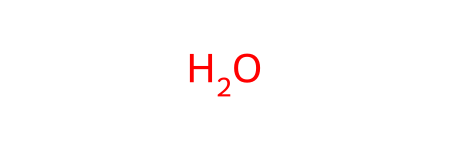

In [2]:
# Import packages
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors

# Test installation by printing a simple molecule
water = Chem.MolFromSmiles('O')
print(f"Water molecule: {Chem.MolToSmiles(water)}")

# Test molecule visualization
water 


# 2. Molecular Representations

## SMILES (Simplified Molecular Input Line Entry System)

SMILES encodes a molecule’s structure as a compact line notation, turning a 2-D chemical diagram into a single text string that computers can parse. It represents:
- **Atoms:** Element symbols like C (carbon), N (nitrogen), O (oxygen)
- **Bonds:** Single bonds implicit, double bonds (=), triple bonds (#)
- **Rings:** Numbers mark ring closures so the string can “loop back”
- **Branches:** Parentheses show side chains branching off the main backbone

Some examples of SMILES:
- Water: `O`
- Ethanol: `CCO`
- Benzene: `c1ccccc1`
- Caffeine: `CN1C=NC2=C1C(=O)N(C(=O)N2C)C`

## RDKit Mol Objects

An RDKit **Mol object** is a computer-readable representation of a molecule. It stores the full molecular graphs/atoms and their chemical information.  This goes beyond a plain SMILES string, which is only a line of text. The SMILES format is ideal for storage and quick exchange, but the Mol object is the working format that lets you analyze, manipulate, and calculate properties directly in RDKit.


In [3]:
# Create molecules from SMILES
molecules = {
    'Water': 'O',
    'Methane': 'C',
    'Ethanol': 'CCO',
    'Benzene': 'c1ccccc1',
    'Caffeine': 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
}

# Convert SMILES to RDKit mol objects
mol_objects = {}
for name, smiles in molecules.items():
    mol = Chem.MolFromSmiles(smiles)
    mol_objects[name] = mol
    print(f"{name}: {smiles}")


Water: O
Methane: C
Ethanol: CCO
Benzene: c1ccccc1
Caffeine: CN1C=NC2=C1C(=O)N(C(=O)N2C)C


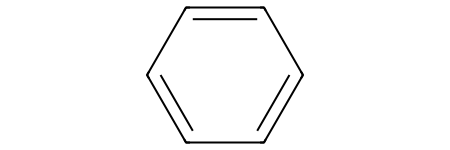

In [4]:
# Display the benzene molecule
mol_objects['Benzene']

In [5]:
# Check some basic molecular properties
benzene = mol_objects['Benzene']

print(f"Number of atoms: {benzene.GetNumAtoms()}")
print(f"Number of bonds: {benzene.GetNumBonds()}")
print(f"Molecular formula: {Chem.rdMolDescriptors.CalcMolFormula(benzene)}")
print(f"Molecular weight: {Descriptors.MolWt(benzene):.2f} g/mol")


Number of atoms: 6
Number of bonds: 6
Molecular formula: C6H6
Molecular weight: 78.11 g/mol


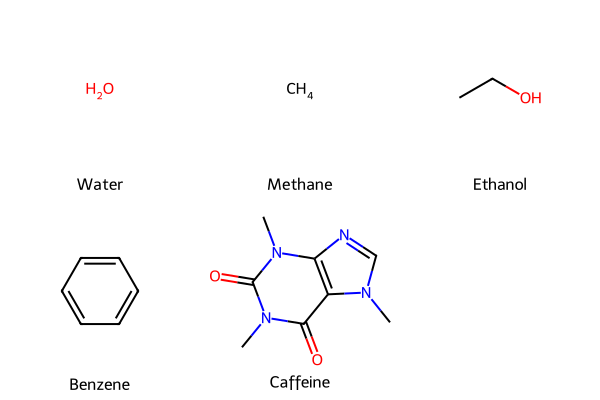

In [6]:
# Visualize multiple molecules in a grid using MolsToGridImage
mol_list = list(mol_objects.values())
names = list(mol_objects.keys())

Draw.MolsToGridImage(mol_list, molsPerRow=3, legends=names, subImgSize=(200, 200))


## SMILES Canonicalization

A single molecule can be written with multiple valid SMILES strings.  
*Canonical SMILES* provide a **unique, standardized representation**, ensuring that the same molecule is always encoded the same way.

Examples of non-canonical SMILES for acetic acid:
- `CC(=O)O`
- `C(C(=O)O)`
- `OC(=O)C`

All represent the same molecule but look different!


In [7]:
# Different SMILES for the same molecule (acetic acid)
acetic_acid_variants = [
    'CC(=O)O',
    'C(C(=O)O)',
    'OC(=O)C'
]

# Convert to mol objects and back to canonical SMILES
canonical_smiles = []
for smiles in acetic_acid_variants:
    mol = Chem.MolFromSmiles(smiles)
    canonical = Chem.MolToSmiles(mol)  # This canonicalizes
    canonical_smiles.append(canonical)
    print(f"Original: {smiles}")
    print(f"Canonical: {canonical}")
    print()


Original: CC(=O)O
Canonical: CC(=O)O

Original: C(C(=O)O)
Canonical: CC(=O)O

Original: OC(=O)C
Canonical: CC(=O)O



In [8]:
# A function to canonicalize SMILES
def canonicalize_smiles(smiles):
    """
    Convert any SMILES to its canonical form.
    
    Args:
        smiles (str): Input SMILES string
        
    Returns:
        str: Canonical SMILES
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Invalid SMILES
    return Chem.MolToSmiles(mol)

# Test canonicalization
test_smiles = ['CCO', 'OCC', 'C(O)C']  # All represent ethanol
for smiles in test_smiles:
    canonical = canonicalize_smiles(smiles)
    print(f"{smiles} --> {canonical}")


CCO --> CCO
OCC --> CCO
C(O)C --> CCO


### Mini Exercise 1

1. Create mol objects for these important chemical engineering molecules:
   - Ethylene: `C=C`
   - Propylene: `CC=C`
   - Toluene: `Cc1ccccc1`

2. Calculate their molecular weights and number of atoms.

3. Canonicalize these SMILES and verify they give the same result:
   - Toluene: `Cc1ccccc1` vs `c1ccc(C)cc1`


In [9]:
# Exercise 1 solution space


# 3. Molecular Descriptors

**Molecular descriptors** are numerical features that quantify molecular properties. They convert molecular structure into vectors that ML algorithms can use.

Some descriptor categories include:
- **Constitutional:** MW, atom counts, bond counts
- **Topological:** Connectivity indices, molecular complexity
- **Physicochemical:** LogP, TPSA, solubility parameters
- **Electronic:** Partial charges, HOMO-LUMO gaps



In [10]:
# Calculate important descriptors for benzene
benzene = Chem.MolFromSmiles('c1ccccc1')

# Constitutional descriptors
mw = Descriptors.MolWt(benzene)
heavy_atoms = benzene.GetNumHeavyAtoms()
h_bond_donors = Descriptors.NumHDonors(benzene)
h_bond_acceptors = Descriptors.NumHAcceptors(benzene)

# Physicochemical descriptors  
logp = Descriptors.MolLogP(benzene)
tpsa = Descriptors.TPSA(benzene)
rotatable_bonds = Descriptors.NumRotatableBonds(benzene)

# Structural descriptors
aromatic_rings = Descriptors.NumAromaticRings(benzene)
rings = Descriptors.RingCount(benzene)

print("Benzene Molecular Descriptors:")
print(f"Molecular Weight: {mw:.2f} g/mol")
print(f"Heavy Atoms: {heavy_atoms}")
print(f"H-bond Donors: {h_bond_donors}")
print(f"H-bond Acceptors: {h_bond_acceptors}")
print(f"LogP: {logp:.2f}")
print(f"TPSA: {tpsa:.2f} Ų")
print(f"Rotatable Bonds: {rotatable_bonds}")
print(f"Aromatic Rings: {aromatic_rings}")
print(f"Total Rings: {rings}")


Benzene Molecular Descriptors:
Molecular Weight: 78.11 g/mol
Heavy Atoms: 6
H-bond Donors: 0
H-bond Acceptors: 0
LogP: 1.69
TPSA: 0.00 Ų
Rotatable Bonds: 0
Aromatic Rings: 1
Total Rings: 1


# 4. Molecular Fingerprints & Similarity

**Molecular fingerprints** encode molecular structure as binary vectors (bit strings). Each bit represents the presence/absence of a specific structural feature.

A common approach is the **Morgan fingerprint**, which encodes circular substructures around each atom. The **radius** controls how many bonds the algorithm explores outward from each atom, while the **length** determines the size of the bit string (typically 1,024 or 2,048 bits). By capturing local chemical environments in this way, Morgan fingerprints provide a consistent numerical description of any molecule.


In [11]:
from rdkit.Chem import rdFingerprintGenerator

# Create Morgan fingerprint generator
# radius=2 means we look 2 bonds away from each atom
# fpSize=2048 means 2048-bit fingerprint
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

# Generate fingerprint for benzene
benzene = Chem.MolFromSmiles('c1ccccc1')
benzene_fp = morgan_gen.GetFingerprint(benzene)

print(f"Fingerprint length: {benzene_fp.GetNumBits()}")
print(f"Number of bits set: {benzene_fp.GetNumOnBits()}")

# Convert to list to see the first few bits
fp_array = benzene_fp.ToList()
print(f"First 20 bits: {fp_array[:20]}")


Fingerprint length: 2048
Number of bits set: 3
First 20 bits: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


The **Tanimoto coefficient** is then used to compare these fingerprints. This makes it the standard metric for assessing molecular similarity once Morgan fingerprints have been generated. It measures the fraction of shared bits between two molecules relative to the total bits set in either one, giving a score from 0 (no common features) to 1 (identical fingerprints).

In [12]:
from rdkit.DataStructs import TanimotoSimilarity

# Create molecules for similarity comparison
molecules_sim = {
    'Caffeine': 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',
    'Theobromine': 'CN1C=NC2=C1C(=O)NC(=O)N2C',    # Similar to caffeine
    'Theophylline': 'CN1C2=C(C(=O)N(C1=O)C)NC=N2', # Similar to caffeine
    'Benzene': 'c1ccccc1',                         # Different structure
    'Toluene': 'Cc1ccccc1'                         # Different structure
}

# Generate fingerprints
fingerprints = {}
for name, smiles in molecules_sim.items():
    mol = Chem.MolFromSmiles(smiles)
    fp = morgan_gen.GetFingerprint(mol)
    fingerprints[name] = fp

# Build similarity matrix as DataFrame
names = list(molecules_sim.keys())
matrix = [
    [TanimotoSimilarity(fingerprints[a], fingerprints[b]) for b in names]
    for a in names
]

similarity_df = pd.DataFrame(matrix, index=names, columns=names)
similarity_df

,Caffeine,Theobromine,Theophylline,Benzene,Toluene
Caffeine,1.000000,0.529412,0.457143,0.037037,0.090909
Theobromine,0.529412,1.000000,0.292683,0.034483,0.085714
Theophylline,0.457143,0.292683,1.000000,0.035714,0.088235
Benzene,0.037037,0.034483,0.035714,1.000000,0.272727
Toluene,0.090909,0.085714,0.088235,0.272727,1.000000


### Mini Exercise 2

1. Calculate Morgan fingerprints for these solvent molecules:
   - Water: `O`
   - Methanol: `CO`
   - Ethanol: `CCO`
   - Propanol: `CCCO`

2. Which alcohol (methanol, ethanol, propanol) is most similar to ethanol?

3. Compare the similarity of water to each alcohol. What do you observe about the trend?


In [13]:
# Exercise 2 solution space


# 5. Working with Datasets

Real-world cheminformatics projects often involve **large collections of molecules**, and RDKit works smoothly with **pandas** to handle them with DataFrames.

In this example we will test RDKit functions over the **ClinTox dataset**, which contains **1,480 drug-like molecules** represented by SMILES strings. Each entry (row) is tagged to indicate whether the compound is an FDA-approved drug or one that failed clinical trials due to toxicity.


## Introduction to Pandas

**Pandas** (Python Data Analysis Library) is a library for data manipulation and analysis in Python.

Key capabilities include:

- **DataFrames:** Two-dimensional labeled data structures (like spreadsheets) that can store different data types in columns

- **Data loading:** Read data from various formats (CSV, Excel, JSON, databases)

- **Data manipulation:** Filter, sort, group, remove and transform data, allowing you to subset molecular libraries, calculate statistics, and prepare whole datasets for machine learning

## Essential Pandas Functions

Before diving into our dataset, let's understand the key pandas functions we'll use:

- `pd.read_csv()`: 
This function loads data from CSV files into a DataFrame. Datasets are commonly stored in CSV format, with each row representing a datapoint (e.g. a molecule) and columns contain descriptors (e.g. SMILES, chemical properties)

- `DataFrame.shape`: 
Returns the dimensions of your dataset as (rows, columns). This is a checkpoint to understand whether you're working with hundreds or thousands of datapoints

- `DataFrame.head()`: 
Displays the first few rows (default 5) of your dataset. This gives you a quick preview of the data structure, column names, and data types

In [14]:
# Load dataset using pd.read_csv()
# This function reads the CSV file from a URL and creates a DataFrame
url = "https://raw.githubusercontent.com/AI4ChemS/CHE-1147/main/data/tutorial_03_clintox.csv"
df = pd.read_csv(url)

# Check dataset dimensions using .shape()
print(f"Dataset shape: {df.shape}")

# Show the first few rows with .head()
print("First few rows:")
df.head()

Dataset shape: (1480, 3)
First few rows:


,smiles,FDA_APPROVED,CT_TOX
0,C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC,1,0
1,[C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...,1,0
2,[C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...,1,0
3,[H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...,1,0
4,[H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...,1,0


Now that we have loaded our dataset, we can to convert the SMILES strings into RDKit molecule objects.

`PandasTools.AddMoleculeColumnToFrame()` is an RDKit function that creates RDKit mol objects from SMILES strings in a specified column, and adds a new column to the DataFrame containing these mol objects

In [15]:
from rdkit.Chem import PandasTools

# Add a column called 'molecule' with mol objects
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles', molCol='molecule')

df.head()


,smiles,FDA_APPROVED,CT_TOX,molecule
0,C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC,1,0,<rdkit.Chem.rdchem.Mol object at 0x00000250B02...
1,[C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...,1,0,<rdkit.Chem.rdchem.Mol object at 0x00000250B02...
2,[C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...,1,0,<rdkit.Chem.rdchem.Mol object at 0x00000250B13...
3,[H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...,1,0,<rdkit.Chem.rdchem.Mol object at 0x00000250B13...
4,[H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...,1,0,<rdkit.Chem.rdchem.Mol object at 0x00000250B13...


We can also check how many molecules were successfully created using pandas. We could do this by counting how many rows in the 'molecule' column are not null, with the functions:
- `.notna()` returns boolean mask for non-null values
- `.sum()` counts True values (successful molecule creations)
- `len()` gives total number of rows in the DataFrame

In [16]:
non_null_mask = df['molecule'].notna()     
num_created = non_null_mask.sum()           
total_rows = len(df) 

print(f"Molecules created: {num_created}/{total_rows}")


Molecules created: 1480/1480


In [17]:
# Define a function to calculate key molecular descriptors
def calculate_key_descriptors(mol):
    """Calculate key molecular descriptors for a molecule."""
    
    descriptors = {
        'MW': Descriptors.MolWt(mol),
        'LogP': Descriptors.MolLogP(mol),
        'TPSA': Descriptors.TPSA(mol),
        'HBD': Descriptors.NumHDonors(mol),
        'HBA': Descriptors.NumHAcceptors(mol),
        'RotBonds': Descriptors.NumRotatableBonds(mol)
    }
    
    return descriptors

# Apply the function to the molecules in the DataFrame
descriptor_data = []
for idx, mol in df['molecule'].items():
    desc = calculate_key_descriptors(mol)
    descriptor_data.append(desc)

# Create descriptor DataFrame with pd.DataFrame()
# We use the same index as the original DataFrame to maintain row alignment
descriptor_df = pd.DataFrame(descriptor_data, index=df.index)

# Combine with the original molecules DataFrame
df_with_descriptors = pd.concat([df, descriptor_df], axis=1)

# Check the new dimensions - we should have the same number of rows but more columns
print(f"Dataset shape: {df_with_descriptors.shape}")
df_with_descriptors.head()


Dataset shape: (1480, 10)


,smiles,FDA_APPROVED,CT_TOX,molecule,MW,LogP,TPSA,HBD,HBA,RotBonds
0,C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC,1,0,<rdkit.Chem.rdchem.Mol object at 0x00000250B02...,334.369,0.4694,112.19,2,7,13
1,[C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...,1,0,<rdkit.Chem.rdchem.Mol object at 0x00000250B02...,290.832,3.6444,0.00,0,0,0
2,[C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...,1,0,<rdkit.Chem.rdchem.Mol object at 0x00000250B13...,208.122,-6.0702,161.18,4,8,5
3,[H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...,1,0,<rdkit.Chem.rdchem.Mol object at 0x00000250B13...,282.347,-3.1586,122.34,4,2,2
4,[H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...,1,0,<rdkit.Chem.rdchem.Mol object at 0x00000250B13...,342.443,-0.7565,121.68,4,2,10


# 6. Exploratory Data Analysis (EDA)

**Exploratory Data Analysis** is the critical first step in any data science project, especially in cheminformatics where understanding the chemical space and data quality is essential before building predictive models.

## Introduction to EDA

EDA is the process of examining and understanding your dataset through:

- **Data overview:** Understanding the structure, size, and types of variables a your chemical dataset
- **Quality assessment:** Identifying missing values, outliers, and potential data quality issues that could affect model performance
- **Distribution analysis:** Examining how molecular properties are distributed across your chemical library
- **Relationship exploration:** Discovering correlations between molecular descriptors and target properties
- **Pattern recognition:** Identifying clusters, trends, and anomalies in chemical space

By mastering exploratory data analysis (EDA), you can make informed decisions about preprocessing and feature selection, spot potential issues before they affect model training, and clearly communicate your results!

## Essential Pandas Functions for EDA

### Dataset Overview Functions

These functions provide the foundation for understanding your dataset:

- `DataFrame.info()`: 
Provides comprehensive metadata about your dataset including column types, non-null counts, and memory usage. Critical for understanding data completeness and identifying columns that need attention.

- `DataFrame.describe()`: 
Generates statistical summaries (mean, std, min, max, quartiles) for the columns. Helps identify the range and distribution of molecular properties in your dataset.


In [18]:
# Import additional libraries for visualization and analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style for better visualizations
plt.style.use("default")
sns.set_palette("husl")

In [19]:
# Check general composition with .info()
df_with_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   smiles        1480 non-null   object 
 1   FDA_APPROVED  1480 non-null   int64  
 2   CT_TOX        1480 non-null   int64  
 3   molecule      1480 non-null   object 
 4   MW            1480 non-null   float64
 5   LogP          1480 non-null   float64
 6   TPSA          1480 non-null   float64
 7   HBD           1480 non-null   int64  
 8   HBA           1480 non-null   int64  
 9   RotBonds      1480 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 115.8+ KB


In [20]:
# Check column statistics with .describe()
df_with_descriptors.describe()

,FDA_APPROVED,CT_TOX,MW,LogP,TPSA,HBD,HBA,RotBonds
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000
mean,0.936486,0.075676,384.491368,1.301971,96.152284,2.241216,5.156757,5.732432
std,0.243967,0.264568,232.125145,3.150286,90.098806,2.866996,4.382153,5.794663
min,0.000000,0.000000,27.026000,-19.396500,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,254.260250,-0.132525,44.900000,1.000000,2.000000,2.000000
50%,1.000000,0.000000,336.464000,1.615470,75.625000,2.000000,4.000000,4.000000
75%,1.000000,0.000000,441.706250,3.147660,113.342500,3.000000,6.250000,7.000000
max,1.000000,1.000000,1882.332000,12.605800,833.780000,25.000000,51.000000,53.000000


### Categorical Data Analysis

For chemical datasets, categorical variables often include compound classes, activity labels, or experimental conditions.

- `DataFrame.value_counts()`: 
Counts unique values in categorical columns. Essential for understanding class distributions.

- `DataFrame.unique()` and `DataFrame.nunique()`: 
    - `unique()` returns array of unique values
    - `nunique()` returns count of unique values
    - Useful for understanding diversity and categorical variable complexity


In [21]:
# Analyze the FDA_APPROVED column using .value_counts()
print("FDA Approval Status Distribution:")
fda_counts = df_with_descriptors['FDA_APPROVED'].value_counts()
print(fda_counts)
    
# Calculate percentages
fda_percentages = df_with_descriptors['FDA_APPROVED'].value_counts(normalize=True) * 100
print("\nFDA Approval Status (Percentages):")
print(fda_percentages.round(1))

# Check unique values 
unique = df_with_descriptors['FDA_APPROVED'].unique()
n_unique = df_with_descriptors['FDA_APPROVED'].nunique()
print(f"\nUnique values: {unique}")
print(f"\nNumber of unique values: {n_unique}")


FDA Approval Status Distribution:
FDA_APPROVED
1    1386
0      94
Name: count, dtype: int64

FDA Approval Status (Percentages):
FDA_APPROVED
1    93.6
0     6.4
Name: proportion, dtype: float64

Unique values: [1 0]

Number of unique values: 2


## Data Visualization

Visualization is essential for understanding patterns, distributions, and relationships in chemical data that might not be apparent from summary statistics alone.

Let's visualize the data distribution of the molecular descriptors:

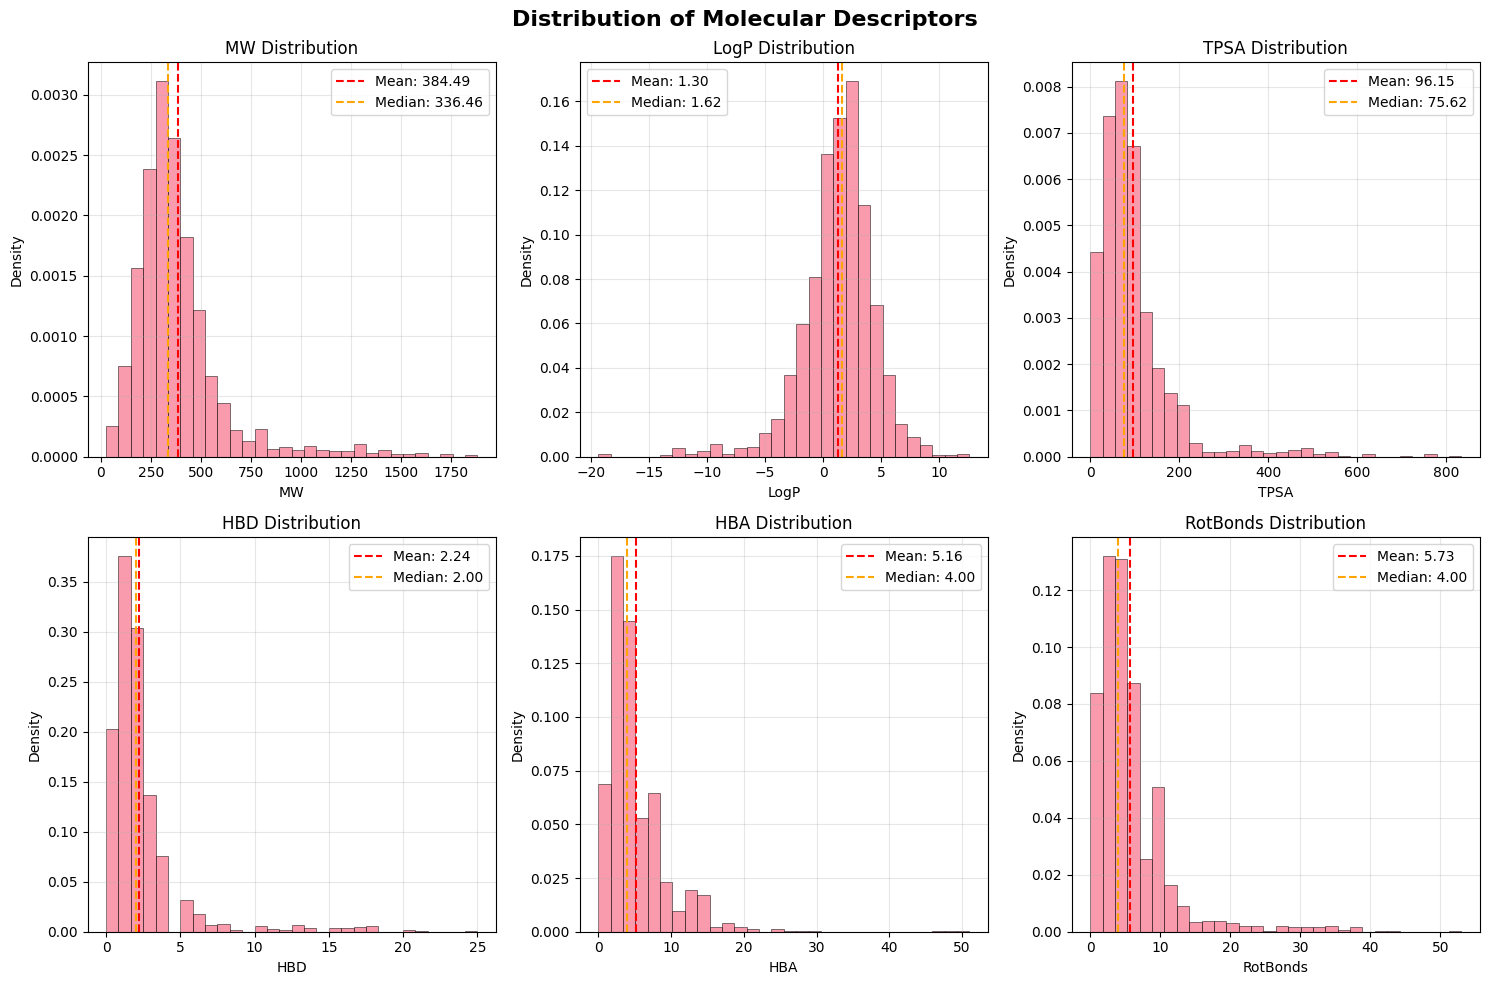

In [22]:
# Create visualizations for molecular descriptors
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Molecular Descriptors', fontsize=16, fontweight='bold')

# Define descriptors to plot
descriptors_to_plot = ['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds']

for i, descriptor in enumerate(descriptors_to_plot):
    row = i // 3
    col = i % 3
    
    # Create histogram with density curve
    axes[row, col].hist(df_with_descriptors[descriptor], bins=30, alpha=0.7, 
                       density=True, edgecolor='black', linewidth=0.5)
    
    # Add statistical information
    mean_val = df_with_descriptors[descriptor].mean()
    median_val = df_with_descriptors[descriptor].median()
    axes[row, col].axvline(mean_val, color='red', linestyle='--', 
                          label=f'Mean: {mean_val:.2f}')
    axes[row, col].axvline(median_val, color='orange', linestyle='--', 
                          label=f'Median: {median_val:.2f}')
    
    axes[row, col].set_title(f'{descriptor} Distribution')
    axes[row, col].set_xlabel(descriptor)
    axes[row, col].set_ylabel('Density')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Correlation Analysis

`DataFrame.corr()` is a useful function for this, it calculates pairwise correlation coefficients between numerical columns. This is essential for understanding which descriptors are related and might provide redundant information.


Correlation Matrix for Molecular Descriptors:
             MW   LogP   TPSA    HBD    HBA  RotBonds
MW        1.000 -0.030  0.791  0.688  0.764     0.745
LogP     -0.030  1.000 -0.527 -0.498 -0.381    -0.101
TPSA      0.791 -0.527  1.000  0.850  0.899     0.655
HBD       0.688 -0.498  0.850  1.000  0.637     0.582
HBA       0.764 -0.381  0.899  0.637  1.000     0.581
RotBonds  0.745 -0.101  0.655  0.582  0.581     1.000


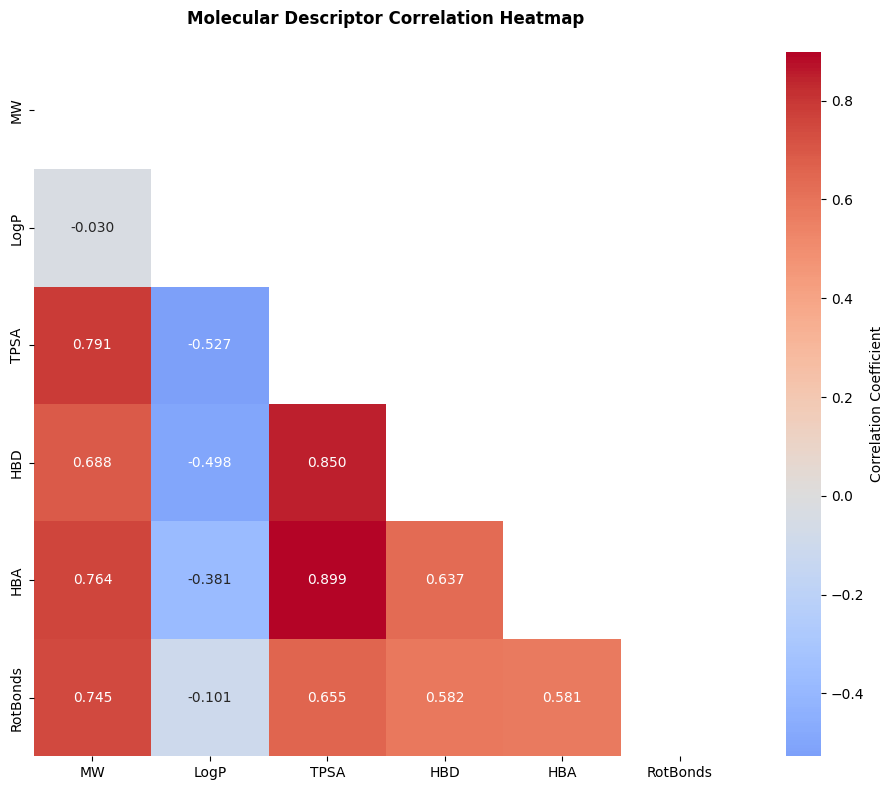

In [23]:
# Calculate correlation matrix for molecular descriptors
descriptor_cols = ['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds']

# Calculate correlation matrix using .corr()
correlation_matrix = df_with_descriptors[descriptor_cols].corr()

# Display correlation matrix
print("Correlation Matrix for Molecular Descriptors:")
print(correlation_matrix.round(3))

# Create correlation heatmap
plt.figure(figsize=(10, 8))

# Use seaborn for a more informative heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Molecular Descriptor Correlation Heatmap', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### Filtering Data

- `loc[]`: enables **label-based** indexing and conditional filtering of rows.  
- `iloc[]`: provides **integer-based** indexing, letting you select rows or columns by their numeric position.

Below we filter molecules that satisfy **Lipinski’s Rule of Five**, a common guideline for drug-likeness:

- Molecular weight (MW) ≤ 500  
- LogP (octanol–water partition coefficient) ≤ 5  
- Hydrogen bond donors (HBD) ≤ 5  
- Hydrogen bond acceptors (HBA) ≤ 10    

In [24]:
# Filter rows with loc[]
lipinski_compliant = df_with_descriptors.loc[
    (df_with_descriptors['MW'] <= 500) &
    (df_with_descriptors['LogP'] <= 5) &
    (df_with_descriptors['HBD'] <= 5) &
    (df_with_descriptors['HBA'] <= 10)
]

print(f"Lipinski Rule of Five Analysis:")
print(f"Total molecules: {len(df_with_descriptors)}")
print(f"Lipinski compliant: {len(lipinski_compliant)} "
      f"({len(lipinski_compliant) / len(df_with_descriptors) * 100:.1f}%)")

# Compare FDA approval rates
total_approved_rate = df_with_descriptors['FDA_APPROVED'].mean() * 100
lipinski_approved_rate = lipinski_compliant['FDA_APPROVED'].mean() * 100

print(f"FDA approval rate (all molecules): {total_approved_rate:.1f}%")
print(f"FDA approval rate (Lipinski compliant): {lipinski_approved_rate:.1f}%")

# Example for iloc: select the first 5 rows and the first 3 columns of the filtered set
print("\nFirst 5 rows and first 3 columns of Lipinski-compliant DataFrame:")
lipinski_compliant.iloc[:5, :3]

Lipinski Rule of Five Analysis:
Total molecules: 1480
Lipinski compliant: 1121 (75.7%)
FDA approval rate (all molecules): 93.6%
FDA approval rate (Lipinski compliant): 94.8%

First 5 rows and first 3 columns of Lipinski-compliant DataFrame:


,smiles,FDA_APPROVED,CT_TOX
0,C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC,1,0
1,[C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...,1,0
2,[C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...,1,0
3,[H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...,1,0
4,[H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...,1,0


### Mini Exercise 3

Now it's your turn to practice EDA skills with the ClinTox dataset!

1. **Analyze CT_TOX column:**
   - Use `.value_counts()` to see the distribution of the CT_TOX column
   - Calculate what percentage of molecules are toxic
   - Compare this to the FDA_APPROVED distribution - what do you notice?

2. **Create a new visualization:**
   - Make a scatter plot of LogP vs TPSA
   - Color the points by FDA_APPROVED status (use red for not approved, blue for approved)
   - Add appropriate labels and title
   - What patterns do you observe? Do approved drugs cluster in certain regions?

3. **Filtering practice:**
   - Create a filter for "small molecules" (MW < 300)
   - How many small molecules are in the dataset?
   - What's the FDA approval rate for small molecules vs larger molecules?
   - Use `.describe()` to compare the descriptor statistics between small and large molecules


In [25]:
# Exercise 3 solution space


# 7. Molecular Featurization

**Molecular featurization** is the process of converting molecular structures into numerical vectors (feature vectors) that machine learning algorithms can process, while preserving important chemical information.

We've already explored the main categories:

1. **Molecular Descriptors** (Section 3): Numerical properties like MW, LogP, TPSA
   - Capture global molecular properties
   - Directly interpretable 
   - Usually 10-200 features

2. **Molecular Fingerprints** (Section 4): Binary vectors encoding structural patterns
   - Capture local structural environments
   - High-dimensional (1024-4096 bits)
   - Excellent for similarity comparisons

Now that we've mastered the use of pandas (Section 5) we can proceed to feature vector construction. Let's get the Morgan fingerprints of the ClinTox dataset.

In [26]:
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)

# Generate fingerprints for all molecules
fingerprints = []
for mol in df_with_descriptors['molecule']:
    fp = morgan_gen.GetFingerprint(mol)
    fingerprints.append(fp.ToList())
    
# Convert to DataFrame with indexed column names
fp_columns = [f'Morgan_bit_{i}' for i in range(1024)]
fingerprint_df = pd.DataFrame(fingerprints, columns=fp_columns, index=df_with_descriptors.index)

print(f"Dataframe of fingerprints shape: {fingerprint_df.shape}")
print(f"First molecule has {sum(fingerprints[0])} bits set out of 1024")

Dataframe of fingerprints shape: (1480, 1024)
First molecule has 35 bits set out of 1024


### Mini Exercise 4: 

 **Compare Similar Molecules:**
   - Select 10  molecules from the dataset (any indices you choose)
   - Calculate their Tanimoto similarity using their Morgan fingerprints
   - Create a similarity matrix and identify which pair is most similar


In [27]:
# Exercise 4 Solution Space
